In [44]:
# MBA DATA SCIENCE & ANALYTICS USP/Esalq
#Supervised ML - SIMPLE AND MULTIPLE REGRESSION ANALYSIS
#Isabela Pereira Lima Dias

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [46]:
#dataset
df = pd.read_csv("companies.csv", delimiter= ",")
df.rename(columns = {'empresa':'company', 'retorno':'returns',
                     'endividamento':'debt','ativos':'assets',
                     'liquidez':'liquidity'}, inplace = True)
df

,company,returns,disclosure,debt,assets,liquidity
0,Adidas,63.67,83,1.3,3967,14.3
1,BASF,55.49,91,33.9,5450,16.8
2,Bayer,52.42,77,36.1,4327,15.5
3,BSH,54.00,90,20.8,4109,16.8
4,Bosch,68.01,93,14.1,4458,17.0
...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5
120,ExxonMobil,44.16,35,16.8,3622,12.3
121,FedEx,45.38,24,16.1,2972,9.7
122,Ford Motors,45.25,68,34.8,4691,8.9


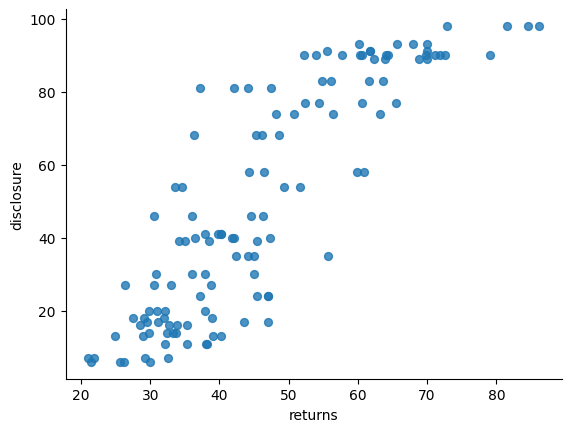

In [47]:
df.plot(kind='scatter', x='returns', y='disclosure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

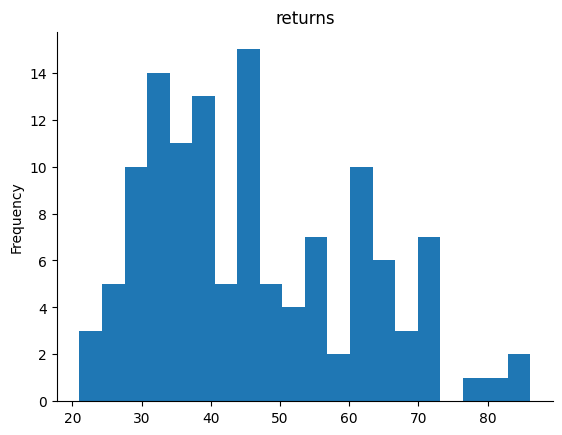

In [48]:
df['returns'].plot(kind='hist', bins=20, title='returns')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:
# Correlation matrix
corr = df.corr()
corr

<ipython-input-49-6d26a06638cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,returns,disclosure,debt,assets,liquidity
returns,1.000000,0.863747,0.004577,0.811349,0.859083
disclosure,0.863747,1.000000,0.136587,0.831343,0.867605
debt,0.004577,0.136587,1.000000,0.228085,-0.081803
assets,0.811349,0.831343,0.228085,1.000000,0.702286
liquidity,0.859083,0.867605,-0.081803,0.702286,1.000000


<ipython-input-50-760ada11dfef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = plt.cm.viridis,


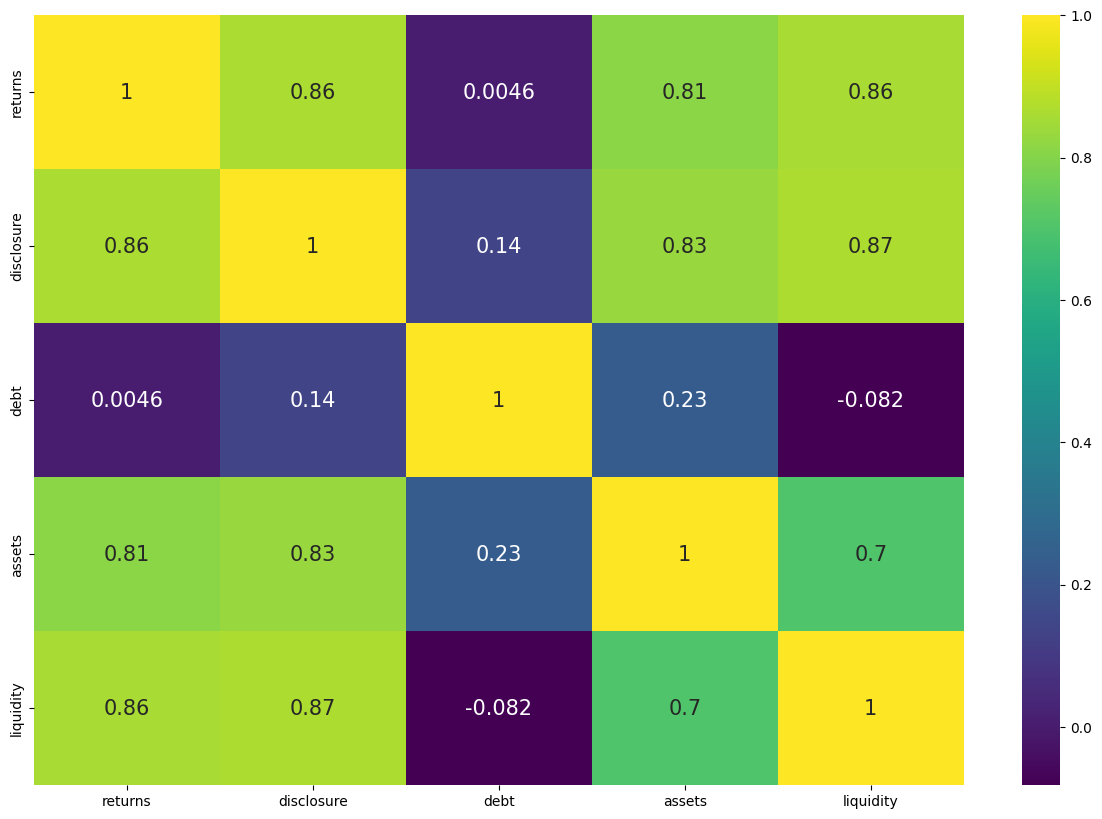

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':15})
plt.show()

<Figure size 1500x1000 with 0 Axes>

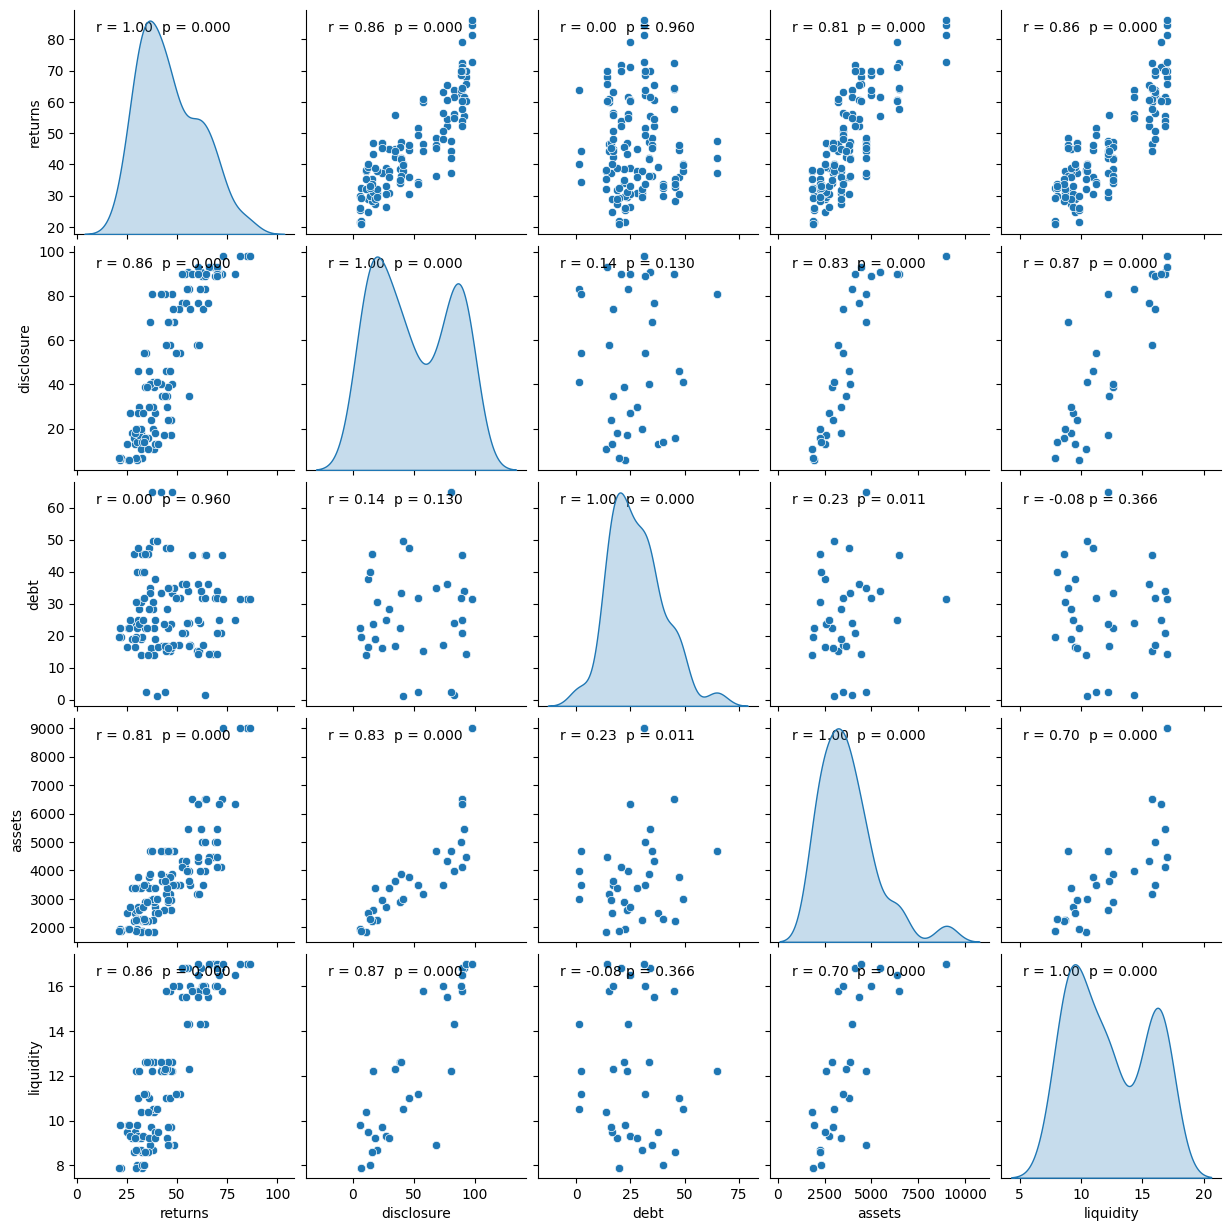

In [51]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df, diag_kind="kde")
graph.map(corrfunc)
plt.show()


In [40]:
df

,company,return,disclosure,debt,assets,liquidity
0,Adidas,63.67,83,1.3,3967,14.3
1,BASF,55.49,91,33.9,5450,16.8
2,Bayer,52.42,77,36.1,4327,15.5
3,BSH,54.00,90,20.8,4109,16.8
4,Bosch,68.01,93,14.1,4458,17.0
...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5
120,ExxonMobil,44.16,35,16.8,3622,12.3
121,FedEx,45.38,24,16.1,2972,9.7
122,Ford Motors,45.25,68,34.8,4691,8.9


In [52]:
#Multiple regression
companies_model = sm.OLS.from_formula("returns ~ disclosure +debt + assets + liquidity", df).fit()
companies_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.35e-45
Time:                        13:24:03   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure     0.1067      0.048      2.227      0.028       0.012       0.202
debt          -0.0882      0.051     -1.723      0.087      -0.190       0.013
assets         0.0035      0.001      5.134      0.000       0.002       0.005
liquidity      1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#stepwise
#!pip install "stepwise-process==2.5"
from stepwise_process.statsmodels import stepwise
step_model = stepwise(companies_model, pvalue_limit=0.05) #significance level


Regression type: OLS 

Estimating model...: 
 returns ~ disclosure + debt + assets + liquidity

 Discarding atribute "debt" with p-value equal to 0.08749071283026177 

Estimating model...: 
 returns ~ disclosure + assets + liquidity

 Discarding atribute "disclosure" with p-value equal to 0.06514029954310709 

Estimating model...: 
 returns ~ assets + liquidity

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'debt', 'p-value': 0.08749071283026177}
{'atribute': 'disclosure', 'p-value': 0.06514029954310709}

 Model after stepwise process...: 
 returns ~ assets + liquidity 

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     282.1
Date:                Wed, 13 Dec 2023   Prob (F

In [55]:
#Shapiro-Francia test
!pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(step_model.resid)


{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9738705318499362,
 'statistics z': 2.0934256948868866,
 'p-value': 0.01815558534418546}

<ipython-input-56-4d99dce6c0e7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(step_model.resid, fit=norm, kde=True, bins=20)


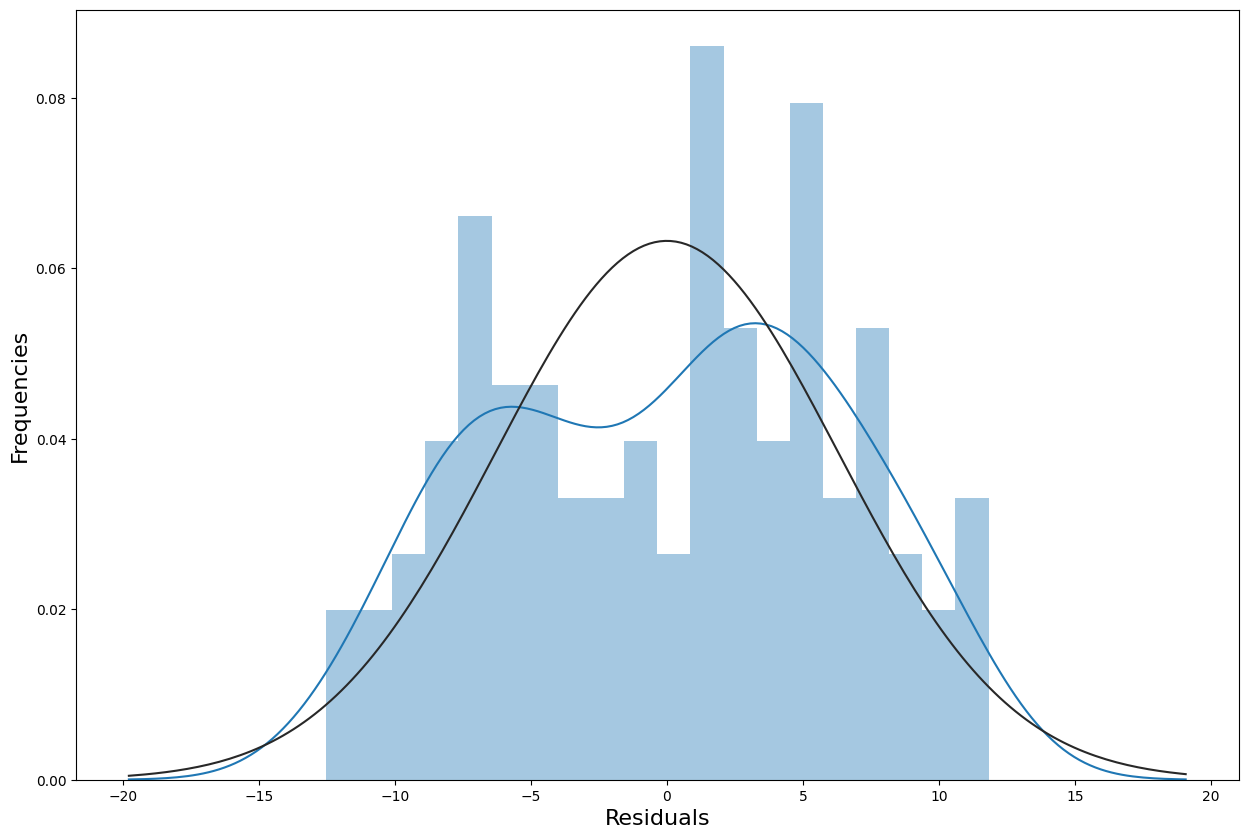

In [56]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
sns.distplot(step_model.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequencies', fontsize=16)
plt.show()

In [58]:
# Box-Cox lambda
from scipy.stats import boxcox
x, lambda_ = boxcox(df['returns'])
#inserting
df["returns_bc"] = x

In [61]:
bc_model = sm.OLS.from_formula('returns_bc ~ disclosure + debt + assets + liquidity', df).fit()
bc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             returns_bc   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.80e-41
Time:                        13:37:31   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8844      0.088     32.752      0.000       2.710       3.059
disclosure     0.0034      0.001      3.291      0.001       0.001       0.005
debt          -0.0013      0.001     -1.133      0.260      -0.003       0.001
assets      4.331e-05   1.46e-05      2.967      0.004    1.44e-05    7.22e-05
liquidity      0.0359      0.009      4.202      0.000       0.019       0.053
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.267
Skew:                          -0.303   Prob(JB):                        0.195
Kurtosis:                       2.486   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#step
step_bc_model = stepwise(bc_model,pvalue_limit=0.05)
#Shapiro-Francia
shapiroFrancia(step_bc_model.resid)

Regression type: OLS 

Estimating model...: 
 returns_bc ~ disclosure + debt + assets + liquidity

 Discarding atribute "debt" with p-value equal to 0.25966291656257406 

Estimating model...: 
 returns_bc ~ disclosure + assets + liquidity

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'debt', 'p-value': 0.25966291656257406}

 Model after stepwise process...: 
 returns_bc ~ disclosure + assets + liquidity 

                            OLS Regression Results                            
Dep. Variable:             returns_bc   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.21e-41
Time:                        13:39:15   Log-Likelihood:                 73.887
No. Observations:                 124   AIC:             

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9870486145293809,
 'statistics z': 0.6866622509559913,
 'p-value': 0.2461477951301025}

<ipython-input-63-9ea5d7f9ae25>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(step_bc_model.resid, fit=norm, kde=True, bins=20)


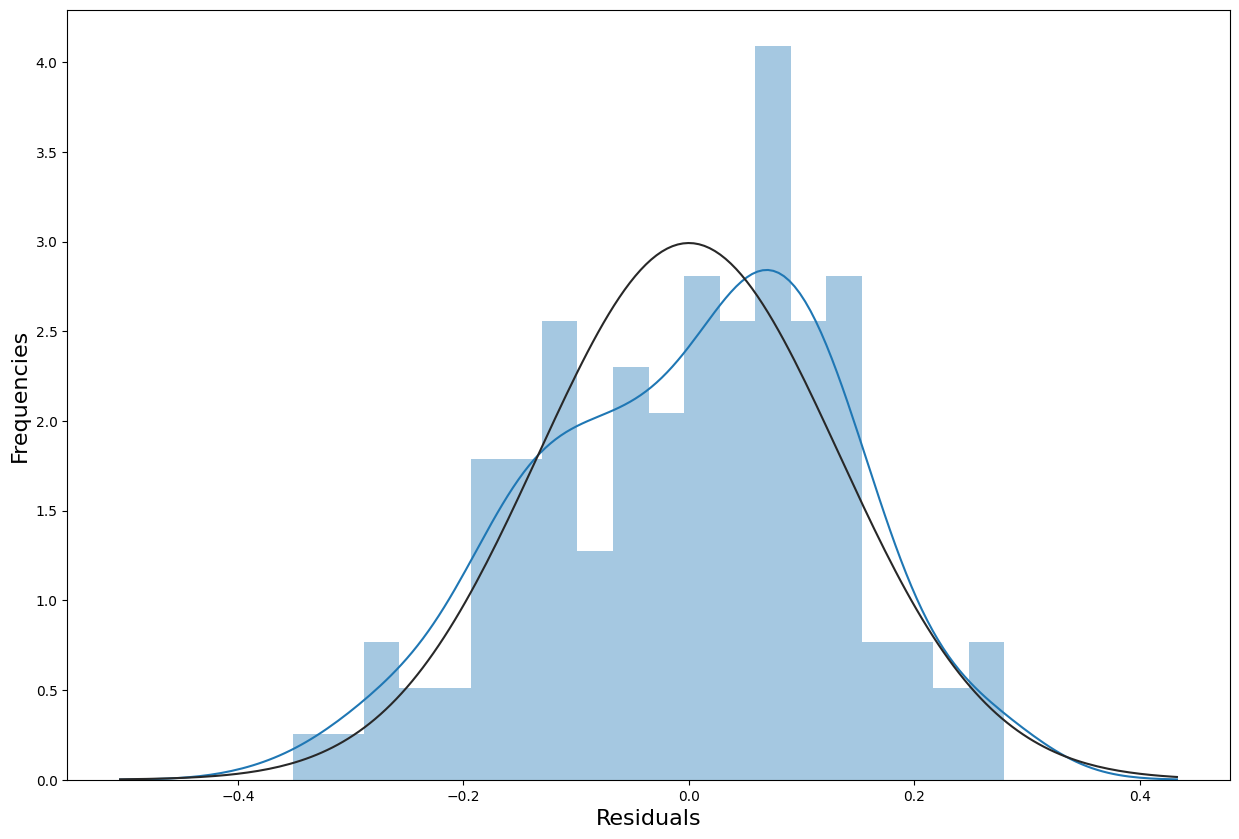

In [63]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(step_bc_model.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequencies', fontsize=16)
plt.show()


In [64]:
summary_col([step_model, step_bc_model],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,STEPWISE,STEPWISE BOX-COX
Intercept,-2.5348,2.8275***
,(2.3409),(0.0725)
R-squared,0.8234,0.7990
R-squared Adj.,0.8205,0.7940
assets,0.0040***,0.0000***
,(0.0005),(0.0000)
disclosure,,0.0031***
,,(0.0010)
liquidity,2.7391***,0.0398***
,(0.2575),(0.0078)


In [66]:
# predicting with the model
step_bc_model.predict(pd.DataFrame({'const':[1],
                                              'disclosure':[50],
                                              'assets':[4000],
                                              'liquidity':[14]}))
(3.702016 * lambda_ + 1) ** (1 / lambda_)

47.74261279070688

In [67]:
df['yhat_step'] = step_model.fittedvalues
df['yhat_step_bc'] = (step_bc_model.fittedvalues* lambda_ + 1) **(1/lambda_)

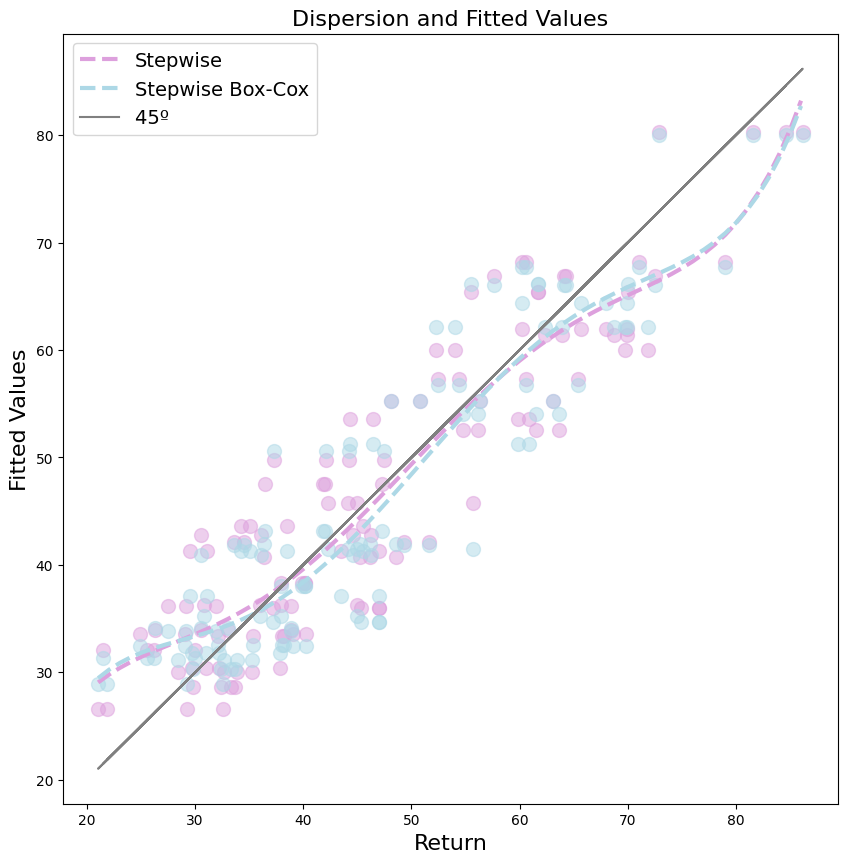

In [70]:
from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df['returns']
ydata_linear = df['yhat_step']
ydata_bc = df['yhat_step_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='plum', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='lightblue', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=100, color='plum')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=100, color='lightblue')
plt.xlabel('Return', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Stepwise','Stepwise Box-Cox','45º '], fontsize=14)
plt.title('Dispersion and Fitted Values', fontsize=16)
plt.show()